In [1]:
import sys
import csv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
path= os.getcwd()
files= os.listdir(path)
files_xls= [f for f in files if f[-4:]== 'xlsx']
#files_xls

    

In [3]:
all_matches = pd.DataFrame()
for f in files_xls:
    data=pd.read_excel(f)
    all_matches = all_matches.append(data)

all_matches.shape

C:\Users\dhava\AppData\Local\Temp\ipykernel_21804\752172395.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_matches = all_matches.append(data)
C:\Users\dhava\AppData\Local\Temp\ipykernel_21804\752172395.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_matches = all_matches.append(data)
C:\Users\dhava\AppData\Local\Temp\ipykernel_21804\752172395.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_matches = all_matches.append(data)
C:\Users\dhava\AppData\Local\Temp\ipykernel_21804\752172395.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_matches = all_matches.append(data)
C:\Users\dhava\AppData\Local\Temp\ipyker

(183, 103)

In [4]:
all_matches.head(5)

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,CrdR,2CrdY,Fl_committed,Fl_Drawn,Offside_y,Own_Goal,Recoveries,Aerial_w,Aerail_L,Team
0,0,2019-03-22,21:00,Friendlies (M),Friendlies (M),Fri,Home,L,1,3,...,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Argentina
1,1,2019-03-26,20:00,Friendlies (M),Friendlies (M),Tue,Away,W,1,0,...,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Argentina
2,2,2019-06-07,21:10,Friendlies (M),Friendlies (M),Fri,Home,W,5,1,...,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Argentina
3,3,2019-06-15,19:00,Copa América,Group stage,Sat,Neutral,L,0,2,...,0,0,13.0,17.0,1.0,0,47.0,12.0,14.0,Argentina
4,4,2019-06-19,21:30,Copa América,Group stage,Wed,Neutral,D,1,1,...,0,0,20.0,17.0,1.0,0,50.0,14.0,12.0,Argentina


In [5]:
all_matches.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
       'GF', 'GA',
       ...
       'CrdR', '2CrdY', 'Fl_committed', 'Fl_Drawn', 'Offside_y', 'Own_Goal',
       'Recoveries', 'Aerial_w', 'Aerail_L', 'Team'],
      dtype='object', length=103)

In [6]:
all_matches.drop(columns=['Unnamed: 0','Time','Comp', 'Round','xG','xGA','Poss','Attendance','Captain','Formation','Referee','Match Report','Notes' ,'Day','SCA_PassLive','GCA_PassLive','SCA_PassDead','GCA_PassDead','SCA_TO','GCA_TO','SCA_Sh','GCA_Sh','SCA_fld','GCA_fld','Tkl+Int'],inplace=True)
all_matches.head()

,Date,Venue,Result,GF,GA,Opponent,Tot_Shot,Shot_oTarget,Shot_Dist,FreeKick,...,CrdR,2CrdY,Fl_committed,Fl_Drawn,Offside_y,Own_Goal,Recoveries,Aerial_w,Aerail_L,Team
0,2019-03-22,Home,L,1,3,ve Venezuela,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Argentina
1,2019-03-26,Away,W,1,0,ma Morocco,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Argentina
2,2019-06-07,Home,W,5,1,ni Nicaragua,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Argentina
3,2019-06-15,Neutral,L,0,2,co Colombia,13.0,6.0,20.9,3.0,...,0,0,13.0,17.0,1.0,0,47.0,12.0,14.0,Argentina
4,2019-06-19,Neutral,D,1,1,py Paraguay,6.0,1.0,20.5,1.0,...,0,0,20.0,17.0,1.0,0,50.0,14.0,12.0,Argentina


In [7]:
all_matches.dtypes

Date           object
Venue          object
Result         object
GF             object
GA             object
               ...   
Own_Goal        int64
Recoveries    float64
Aerial_w      float64
Aerail_L      float64
Team           object
Length: 78, dtype: object

In [8]:
all_matches["Date"] = pd.to_datetime(all_matches["Date"])
all_matches.dtypes

Date          datetime64[ns]
Venue                 object
Result                object
GF                    object
GA                    object
                   ...      
Own_Goal               int64
Recoveries           float64
Aerial_w             float64
Aerail_L             float64
Team                  object
Length: 78, dtype: object

In [9]:
all_matches["venue_code"] = all_matches["Venue"].astype("category").cat.codes ### 1- Home,0- Away,2-Neutral
all_matches

,Date,Venue,Result,GF,GA,Opponent,Tot_Shot,Shot_oTarget,Shot_Dist,FreeKick,...,2CrdY,Fl_committed,Fl_Drawn,Offside_y,Own_Goal,Recoveries,Aerial_w,Aerail_L,Team,venue_code
0,2019-03-22,Home,L,1,3,ve Venezuela,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Argentina,1
1,2019-03-26,Away,W,1,0,ma Morocco,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Argentina,0
2,2019-06-07,Home,W,5,1,ni Nicaragua,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Argentina,1
3,2019-06-15,Neutral,L,0,2,co Colombia,13.0,6.0,20.9,3.0,...,0,13.0,17.0,1.0,0,47.0,12.0,14.0,Argentina,2
4,2019-06-19,Neutral,D,1,1,py Paraguay,6.0,1.0,20.5,1.0,...,0,20.0,17.0,1.0,0,50.0,14.0,12.0,Argentina,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,2019-11-19,Away,W,4,1,jp Japan,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Venezuela,0
0,2021-06-13,Neutral,L,0,3,br Brazil,3.0,1.0,26.8,0.0,...,0,14.0,11.0,1.0,0,40.0,9.0,12.0,Venezuela,2
1,2021-06-17,Neutral,D,0,0,co Colombia,2.0,0.0,29.8,0.0,...,0,14.0,12.0,0.0,0,47.0,8.0,26.0,Venezuela,2
2,2021-06-20,Neutral,D,2,2,ec Ecuador,9.0,3.0,16.0,0.0,...,0,7.0,15.0,2.0,0,47.0,14.0,21.0,Venezuela,2


In [10]:
all_matches["opp_code"] = all_matches["Opponent"].astype("category").cat.codes

In [11]:
all_matches['year'] = all_matches['Date'].dt.year
all_matches

,Date,Venue,Result,GF,GA,Opponent,Tot_Shot,Shot_oTarget,Shot_Dist,FreeKick,...,Fl_Drawn,Offside_y,Own_Goal,Recoveries,Aerial_w,Aerail_L,Team,venue_code,opp_code,year
0,2019-03-22,Home,L,1,3,ve Venezuela,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,Argentina,1,35,2019
1,2019-03-26,Away,W,1,0,ma Morocco,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,Argentina,0,19,2019
2,2019-06-07,Home,W,5,1,ni Nicaragua,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,Argentina,1,22,2019
3,2019-06-15,Neutral,L,0,2,co Colombia,13.0,6.0,20.9,3.0,...,17.0,1.0,0,47.0,12.0,14.0,Argentina,2,5,2019
4,2019-06-19,Neutral,D,1,1,py Paraguay,6.0,1.0,20.5,1.0,...,17.0,1.0,0,50.0,14.0,12.0,Argentina,2,25,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,2019-11-19,Away,W,4,1,jp Japan,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,Venezuela,0,17,2019
0,2021-06-13,Neutral,L,0,3,br Brazil,3.0,1.0,26.8,0.0,...,11.0,1.0,0,40.0,9.0,12.0,Venezuela,2,3,2021
1,2021-06-17,Neutral,D,0,0,co Colombia,2.0,0.0,29.8,0.0,...,12.0,0.0,0,47.0,8.0,26.0,Venezuela,2,5,2021
2,2021-06-20,Neutral,D,2,2,ec Ecuador,9.0,3.0,16.0,0.0,...,15.0,2.0,0,47.0,14.0,21.0,Venezuela,2,9,2021


In [12]:
all_matches['target'] = (all_matches['Result'] == "W").astype("int")
all_matches 

,Date,Venue,Result,GF,GA,Opponent,Tot_Shot,Shot_oTarget,Shot_Dist,FreeKick,...,Offside_y,Own_Goal,Recoveries,Aerial_w,Aerail_L,Team,venue_code,opp_code,year,target
0,2019-03-22,Home,L,1,3,ve Venezuela,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,Argentina,1,35,2019,0
1,2019-03-26,Away,W,1,0,ma Morocco,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,Argentina,0,19,2019,1
2,2019-06-07,Home,W,5,1,ni Nicaragua,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,Argentina,1,22,2019,1
3,2019-06-15,Neutral,L,0,2,co Colombia,13.0,6.0,20.9,3.0,...,1.0,0,47.0,12.0,14.0,Argentina,2,5,2019,0
4,2019-06-19,Neutral,D,1,1,py Paraguay,6.0,1.0,20.5,1.0,...,1.0,0,50.0,14.0,12.0,Argentina,2,25,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,2019-11-19,Away,W,4,1,jp Japan,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,Venezuela,0,17,2019,1
0,2021-06-13,Neutral,L,0,3,br Brazil,3.0,1.0,26.8,0.0,...,1.0,0,40.0,9.0,12.0,Venezuela,2,3,2021,0
1,2021-06-17,Neutral,D,0,0,co Colombia,2.0,0.0,29.8,0.0,...,0.0,0,47.0,8.0,26.0,Venezuela,2,5,2021,0
2,2021-06-20,Neutral,D,2,2,ec Ecuador,9.0,3.0,16.0,0.0,...,2.0,0,47.0,14.0,21.0,Venezuela,2,9,2021,0


In [13]:
all_matches.dtypes

Date          datetime64[ns]
Venue                 object
Result                object
GF                    object
GA                    object
                   ...      
Team                  object
venue_code              int8
opp_code                int8
year                   int64
target                 int32
Length: 82, dtype: object

In [14]:
list(all_matches.select_dtypes(include='object').columns)

['Venue', 'Result', 'GF', 'GA', 'Opponent', 'Team']

In [15]:
all_matches['GF']=all_matches['GF'].astype(str).str.slice(0,2)
all_matches['GF'] = pd.to_numeric(all_matches['GF'], errors='coerce')
all_matches['GA']=all_matches['GA'].astype(str).str.slice(0,2)
all_matches['GA'] = pd.to_numeric(all_matches['GA'], errors='coerce')

In [16]:
all_matches.fillna(0, inplace=True)

## Feature Engineering

In [17]:
### Shooting metrics
all_matches['Shot_onTarget%']= round((all_matches['Shot_oTarget'] / all_matches['Tot_Shot'])*100,2)
all_matches['Shot_onTarget%'] = all_matches['Shot_onTarget%'].fillna(0)

all_matches['Goals_per_Shot']= (all_matches['GF'] / all_matches['Tot_Shot'])
all_matches['Goals_per_Shot'] = all_matches['Goals_per_Shot'].fillna(0)

all_matches['Goals_per_ShotonTarget']= (all_matches['GF'] / all_matches['Shot_oTarget'])
all_matches['Goals_per_ShotonTarget'] = all_matches['Goals_per_ShotonTarget'].fillna(0)

all_matches['Penalty_conversion']= (all_matches['PK'] / all_matches['PKattempted'])
all_matches['Penalty_conversion'] = all_matches['Penalty_conversion'].fillna(0)

In [18]:
### GoalKeeping Metrics

all_matches['Save%'] = round(((all_matches['SoTA']-all_matches['GA']) / (all_matches['SoTA'])) *100,2)
all_matches['Save%']= all_matches['Save%'].fillna(0)

all_matches['PK_saved%'] = round((all_matches['PKsv'] / all_matches['Opp_PKatt']) *100,2)
all_matches['PK_saved%'] = all_matches['PK_saved%'].fillna(0)

all_matches['Crs_saved%'] = round((all_matches['CRSStop'] / all_matches['Opp_crsPA']) *100,2)
all_matches['Crs_saved%'] = all_matches['Crs_saved%'].fillna(0)

In [19]:
### Passing Metrics

all_matches['%Passing_Completed'] = round((all_matches['Tot_Cmp']/all_matches['Tot_Att'])*100,2)
all_matches['%Passing_Completed'] = all_matches['%Passing_Completed'].fillna(0)

In [20]:
## Defensive Metrics

all_matches['Total_tkls'] = all_matches['Tkl_Def_3rd']+all_matches['Tkl_Mid_3rd']+all_matches['Tkl_Att_3rd']
all_matches['Total_tkls'] = all_matches['Total_tkls'].fillna(0)

all_matches['AerialDuelWin%'] = round(all_matches['Aerial_w']/(all_matches['Aerial_w']+all_matches['Aerail_L'])*100,2)
all_matches['AerialDuelWin%'] = all_matches['AerialDuelWin%'].fillna(0)

## Fl_committed,Own_Goal,Recoveries

In [21]:
## Possession Metrics
all_matches['Total_touches'] = all_matches['Touches_Def_Pen']+all_matches['Touches_Def3rd']+all_matches['Touches_Mid_3rd']+all_matches['Touches_Att_3rd']+all_matches['Touches_AttPen']
all_matches['Total_touches'] = all_matches['Total_touches'].fillna(0)

all_matches['%Successful_Takeon'] = round((all_matches['Tko_Succ']/all_matches['Tko_Att'])*100,2)
all_matches['%Successful_Takeon'] = all_matches['%Successful_Takeon'].fillna(0)
## No._Carries,Miscontrols,Dispossessed

In [22]:
## Finding correlations for getting weights for 

att_cols = ['Shot_onTarget%','Goals_per_Shot','Goals_per_ShotonTarget','Penalty_conversion','SCA','GCA','target']
def_cols = ['Total_tkls','AerialDuelWin%','Fl_committed','Own_Goal','Recoveries','Sh_blocked','Intercept','Clearance','Errors','target']
gk_cols = ['CleanSheet','Save%','PK_saved%','Crs_saved%','target']
pass_cols = ['%Passing_Completed',"Throughball","Switch","Crosses","CornerKick","Tot_Pass_Dist","TotPrgDist","Assist","KeyPass","Pass_1/3","PassPA","CrsPA",'No._Carries','target']



In [23]:
## Attack Score
att_corr = all_matches[att_cols].corr()['target'].drop('target')
att_weights = att_corr.abs()/att_corr.abs().sum()

all_matches['Attack_Score'] = (all_matches['Shot_onTarget%'] * att_weights['Shot_onTarget%'] +
                        all_matches['Goals_per_Shot'] * att_weights['Goals_per_Shot'] +
                        all_matches['Goals_per_ShotonTarget'] * att_weights['Goals_per_ShotonTarget'] +
                        all_matches['Penalty_conversion'] * att_weights['Penalty_conversion'] +
                        all_matches['SCA'] * att_weights['SCA'] +
                        all_matches['GCA'] * att_weights['GCA'])





In [24]:
## Defensive Score
def_corr = all_matches[def_cols].corr()['target'].drop('target')
def_weights = def_corr.abs()/def_corr.abs().sum()

all_matches['Defense_Score'] = (all_matches['Total_tkls'] * def_weights['Total_tkls'] +
                        all_matches['AerialDuelWin%'] * def_weights['AerialDuelWin%'] +
                        all_matches['Fl_committed'] * def_weights['Fl_committed'] +
                        all_matches['Own_Goal'] * def_weights['Own_Goal'] +
                        all_matches['Recoveries'] * def_weights['Recoveries'] +
                        all_matches['Sh_blocked'] * def_weights['Sh_blocked'] + 
                        all_matches['Intercept'] * def_weights['Intercept'] +
                        all_matches['Clearance'] * def_weights['Clearance'] +
                        all_matches['Errors'] * def_weights['Sh_blocked'] )


In [25]:
## Goal Keeper Score
gk_corr = all_matches[gk_cols].corr()['target'].drop('target')
gk_weights = gk_corr.abs()/gk_corr.abs().sum()

all_matches['GoalKeeper_Score'] = (all_matches['CleanSheet'] * gk_weights['CleanSheet'] +
                        all_matches['Save%'] * gk_weights['Save%'] +
                        all_matches['Crs_saved%'] * gk_weights['Crs_saved%'] +
                        all_matches['PK_saved%'] * gk_weights['PK_saved%'] )

In [26]:
## Passing Score
pass_corr = all_matches[pass_cols].corr()['target'].drop('target')
pass_weights = pass_corr.abs()/pass_corr.abs().sum()

all_matches['Passing_Score'] = (all_matches['%Passing_Completed'] * pass_weights['%Passing_Completed'] +
                        all_matches['Throughball'] * pass_weights['Throughball'] +
                        all_matches['Switch'] * pass_weights['Switch'] +
                        all_matches['Crosses'] * pass_weights['Crosses'] +
                        all_matches['CornerKick'] * pass_weights['CornerKick'] +
                        all_matches['Tot_Pass_Dist'] * pass_weights['Tot_Pass_Dist'] + 
                        all_matches['TotPrgDist'] * pass_weights['TotPrgDist'] +
                        all_matches['Assist'] * pass_weights['Assist'] +
                        all_matches['KeyPass'] * pass_weights['KeyPass'] +
                        all_matches['Pass_1/3'] * pass_weights['Pass_1/3'] +
                        all_matches['PassPA'] * pass_weights['PassPA'] +
                        all_matches['CrsPA'] * pass_weights['CrsPA'] +
                        all_matches['No._Carries'] *pass_weights['No._Carries']    )

In [27]:
all_matches.replace([np.inf, -np.inf], np.nan, inplace=True)
all_matches.fillna(0, inplace=True)
all_matches.columns

Index(['Date', 'Venue', 'Result', 'GF', 'GA', 'Opponent', 'Tot_Shot',
       'Shot_oTarget', 'Shot_Dist', 'FreeKick', 'PK', 'PKattempted', 'SoTA',
       'Saves', 'CleanSheet', 'Opp_PKatt', 'PKsv', 'Opp_crsPA', 'CRSStop',
       'OutsidePA', 'Tot_Cmp', 'S_Cmp', 'M_Cmp', 'L_Cmp', 'Tot_Att', 'S_Cmp.1',
       'M_Cmp.1', 'L_Cmp.1', 'Tot_Pass_Dist', 'TotPrgDist', 'Assist',
       'KeyPass', 'Pass_1/3', 'PassPA', 'CrsPA', 'Throughball', 'Switch',
       'Crosses', 'CornerKick', 'Offside_x', 'Blocks', 'SCA', 'GCA', 'TklW',
       'Tkl_Def_3rd', 'Tkl_Mid_3rd', 'Tkl_Att_3rd', 'Dribblers_Tkl_total',
       'Tkl_Lost', 'Sh_blocked', 'Pass_blocked', 'Intercept', 'Clearance',
       'Errors', 'Touches_Def_Pen', 'Touches_Def3rd', 'Touches_Mid_3rd',
       'Touches_Att_3rd', 'Touches_AttPen', 'Tko_Att', 'Tko_Succ', 'Tkld_tko',
       'No._Carries', 'No._Carries_1/3', 'Carries_PA', 'Miscontrols',
       'Dispossessed', 'CrdY', 'CrdR', '2CrdY', 'Fl_committed', 'Fl_Drawn',
       'Offside_y', 'Own_Goal

### Model Creation

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score

In [29]:
train = all_matches[all_matches["year"] == 2019]
test=all_matches[all_matches["year"]== 2021]

In [30]:
x_train=train.drop(columns=['Date','Result','Venue','Opponent','Team','year','target']) 
x_train.shape

(118, 91)

In [31]:
y_train=train[['target']]
y_train.shape

(118, 1)

In [32]:
x_test=test.drop(columns=['Date','Result','Venue','Opponent','Team','year','target'])
y_test=test[['target']]

### Teams with Most Wins

In [33]:
wins_df = all_matches[all_matches['Result'] == 'W']
team_wins = wins_df.groupby('Team').size().reset_index(name='win_count')
most_wins=team_wins.sort_values(by='win_count',ascending=False)
most_wins

,Team,win_count
0,Argentina,13
2,Brazil,13
8,Uruguay,8
3,Chile,7
7,Peru,7
9,Venezuela,6
5,Ecuador,5
6,Paraguay,5
1,Bolivia,2
4,Colombia,2


## Teams with Best Shooting Score

In [34]:
sdf=all_matches[['Team','Attack_Score']]
sdf=sdf.groupby('Team').mean().reset_index()
sdf.sort_values(by='Attack_Score',ascending=False)

,Team,Attack_Score
4,Colombia,3.420113
2,Brazil,2.244106
0,Argentina,2.117771
8,Uruguay,1.794014
7,Peru,1.651510
3,Chile,1.646570
6,Paraguay,1.304016
9,Venezuela,1.108329
1,Bolivia,1.081266
5,Ecuador,1.063455


## Teams with Best Defensive Score

In [35]:
ddf=all_matches[['Team','Defense_Score']]
ddf=ddf.groupby('Team').mean().reset_index()
ddf.sort_values(by='Defense_Score',ascending=False)

,Team,Defense_Score
4,Colombia,11.771328
7,Peru,6.939202
0,Argentina,6.295687
2,Brazil,5.896857
3,Chile,5.714213
9,Venezuela,5.713587
8,Uruguay,5.704163
6,Paraguay,5.461213
1,Bolivia,4.255742
5,Ecuador,4.111092


## Teams with Best GK Score

In [36]:
gdf=all_matches[['Team','GoalKeeper_Score']]
gdf=gdf.groupby('Team').mean().reset_index()
gdf.sort_values(by='GoalKeeper_Score',ascending=False)

,Team,GoalKeeper_Score
4,Colombia,7.408115
2,Brazil,6.788466
0,Argentina,6.501639
7,Peru,6.130446
9,Venezuela,5.634560
8,Uruguay,4.981056
3,Chile,4.978172
6,Paraguay,4.514195
1,Bolivia,3.492438
5,Ecuador,2.808064


## Teams with Best Passing Score

In [37]:
pdf=all_matches[['Team','Passing_Score']]
pdf=pdf.groupby('Team').mean().reset_index()
pdf.sort_values(by='Passing_Score',ascending=False)

,Team,Passing_Score
4,Colombia,155.295677
2,Brazil,107.411111
3,Chile,93.124034
8,Uruguay,92.320039
0,Argentina,86.644153
7,Peru,80.346188
6,Paraguay,71.272669
9,Venezuela,66.552424
5,Ecuador,58.220363
1,Bolivia,50.526275


### Model with GridSearch

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
rfc=RandomForestClassifier(random_state=42)

In [40]:
param_grid = { 
    'n_estimators': [50,100,150,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [41]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

c:\Users\dhava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\dhava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\dhava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\dhava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [42]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 50}

In [43]:
rfc1=RandomForestClassifier(criterion='gini',max_depth=8,max_features='auto',n_estimators=100,random_state=42)

In [44]:
rfc1.fit(x_train,y_train)

C:\Users\dhava\AppData\Local\Temp\ipykernel_21804\2285310047.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc1.fit(x_train,y_train)


RandomForestClassifier(max_depth=8, random_state=42)

In [45]:
y_pred=rfc1.predict(x_test)

In [46]:
print("ACCURACY OF THE MODEL:",accuracy_score(y_test, y_pred))
print("Precision OF THE MODEL:",precision_score(y_test, y_pred))

ACCURACY OF THE MODEL: 0.7846153846153846
Precision OF THE MODEL: 0.8571428571428571


In [47]:
features=x_train.columns

In [48]:
importances = rfc1.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': features, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)
imp=feature_imp_df.head(10)
f=imp['Feature']
i=imp['Gini Importance']

          Feature  Gini Importance
0              GF         0.209856
26         Assist         0.104976
1              GA         0.076468
90  Passing_Score         0.059781
10     CleanSheet         0.058700
..            ...              ...
20        Tot_Att         0.000307
49         Errors         0.000161
14        CRSStop         0.000053
80      PK_saved%         0.000000
68      Offside_y         0.000000

[91 rows x 2 columns]


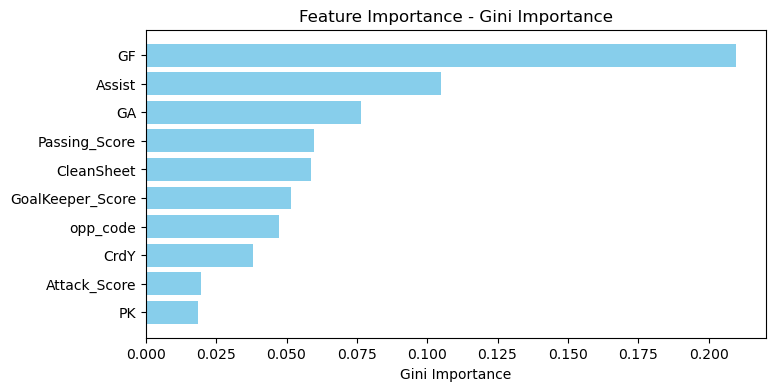

In [49]:
plt.figure(figsize=(8, 4))
plt.barh( f,  i, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

### Creating Simulations

In [50]:
teams = list(all_matches['Team'].unique())
#teams

In [51]:
cols=list(imp.Feature.unique())
cols.append('target')
cols

['GF',
 'Assist',
 'GA',
 'Passing_Score',
 'CleanSheet',
 'GoalKeeper_Score',
 'opp_code',
 'CrdY',
 'Attack_Score',
 'PK',
 'target']

In [52]:
def get_team_stats(team_1):
    team_stats=all_matches[all_matches['Team']== team_1]
    team_stats.drop(columns=['Date','Result','Venue','Opponent','Team','year','target'],inplace = True)
    #print(team_stats.iloc[-7:],type(team_stats))
    #team_stats=team_stats.tail[7]
    return team_stats.iloc[-7:]

In [53]:
wining = {team:0 for team in teams}

In [54]:
for i in range(10):
    for team1 in teams:
        for team2 in teams:
            if team1!=team2:
                match_data1=get_team_stats(team1)
                match_data2=get_team_stats(team2)

                team1_prob=rfc1.predict_proba(match_data1)[:, 1].mean()
                team2_prob=rfc1.predict_proba(match_data2)[:, 1].mean()


                if team1_prob > team2_prob:
                    wining[team1] +=1
                else:
                    wining[team2] +=2

winner=max(wining,key=wining.get)
print(f"The predicted winner is {winner}.")

C:\Users\dhava\AppData\Local\Temp\ipykernel_21804\1962337557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_stats.drop(columns=['Date','Result','Venue','Opponent','Team','year','target'],inplace = True)
C:\Users\dhava\AppData\Local\Temp\ipykernel_21804\1962337557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_stats.drop(columns=['Date','Result','Venue','Opponent','Team','year','target'],inplace = True)
C:\Users\dhava\AppData\Local\Temp\ipykernel_21804\1962337557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

The predicted winner is Argentina.
